# Lab 2: Stability and accuracy  (Jan. 2020)

## Stability of Difference Approximations

The easiest way to introduce the concept of stability is for you to see
it yourself.



<div id="Problem-Stability" />

### Problem Stability  -- hand in as part of a jupyter notebook

This example is a slight modification of
[Problem accuracy](#Problem-Accuracy) from the previous section on accuracy. We
will add one scheme (backward euler) and drop the 4th order Runge-Kutta,
and change the focus from error to stability. The value of $\lambda$ is
assumed a constant, so that the backward Euler scheme results in an
explicit method, and we’ll also compute a bit further in time, so that
any instability manifests itself more clearly. Run the 
[stability2.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab2/stability2.py) script in ipython or the notebook with $\lambda= -8\ s^{-1}$, with $\Delta t$ values
that just straddle the stability condition for the forward euler scheme
($\Delta t < \frac{-2}{\lambda}$, derived below). Hand in plots with
comments that show that 1) the stability condition does in fact predict
the onset of the instablity in the euler scheme, and 2) the backward
euler and leapfrog are either stable or unstable for the same $\Delta t$
values. (you should run out to longer than tend=10 seconds to see if
there is a delayed instability.)

The heat conduction problem, as you saw in Lab \#1, has solutions that
are stable when $\lambda<0$. It is clear from
[Problem stability](#Problem-Stability) above that some higher order schemes
(namely, the leap-frog scheme) introduce a spurious oscillation not
present in the continuous solution. This is called a *computational* or
*numerical instability*, because it is an artifact of the discretization
process only. This instability is not a characteristic of the heat
conduction problem alone, but is present in other problems where such
schemes are used. Furthermore, as we will see below, even a scheme such
as forward Euler can be unstable for certain problems and choices of the
time step.

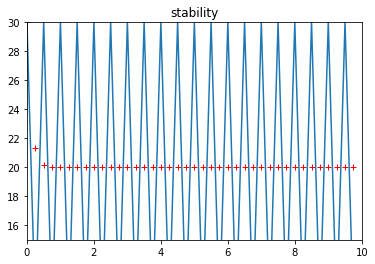

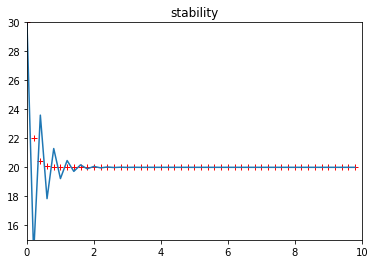

In [49]:


import numpy as np

def heat(theTemp,Ta,theLambda):
    out=theLambda*(theTemp-Ta)
    return out

def euler(npts,tend,To,Ta,theLambda):


    theTemp=np.empty([npts,],np.float64)
    theTemp[0]=To
    dt=tend/npts
    theTime=np.empty_like(theTemp)
    theTime[0]=0.
    for timeStep in np.arange(1,npts):
        theTime[timeStep]=theTime[timeStep-1] + dt
        theTemp[timeStep]=theTemp[timeStep-1] + \
            heat(theTemp[timeStep-1],Ta, theLambda)*dt
    return (theTime,theTemp)

def beuler(npts,tend,To,Ta,theLambda):
    #pdb.set_trace()
    dt=tend/npts;
    theTemp=np.empty([npts,],np.float64)
    theTemp[0]=To
    theTime=np.zeros_like(theTemp)
    for timeStep in np.arange(1,npts):
        theTime[timeStep]=theTime[timeStep-1] + dt
        theTemp[timeStep] = (theTemp[timeStep-1]-theLambda*dt*Ta)/(1-theLambda*dt)
    return (theTime,theTemp)

def leapfrog (npts,tend,To,Ta,theLambda):
    dt=tend/npts
    theTemp=np.empty([npts,],np.float64)
    theTemp[0]=To
    theTime=np.empty_like(theTemp)
# estimate first step by forward euler as need two steps to do leapfrog
    theTemp[1] = To + heat(To,Ta,theLambda)*dt
    theTime[1] = dt
# correct first step by estimating the temperature at a half-step
    Th = To + 0.5*(theTemp[1]-To)
    theTemp[1] = To + heat(Th,Ta,theLambda)*dt
    for timeStep in np.arange(2,npts):
        theTime[timeStep]=theTime[timeStep-1] + dt
        theTemp[timeStep] = theTemp[timeStep-2]+\
                            heat(theTemp[timeStep-1],Ta,theLambda)*2.*dt
    return (theTime,theTemp)

def midpoint (npts,tend,To,Ta,theLambda):
    dt=tend/npts
    theTemp=np.empty([npts,],np.float64)
    theTemp[0]=To
    theTime=np.empty_like(theTemp)
# estimate first step by forward euler as need two steps to do leapfrog
    theTemp[1] = To + heat(To,Ta,theLambda)*dt
    theTime[1] = dt
# correct first step by estimating the temperature at a half-step
    Th = To + 0.5*(theTemp[1]-To)
    theTemp[1] = To + heat(Th,Ta,theLambda)*dt
    for timeStep in np.arange(2,npts):
        theTime[timeStep]=theTime[timeStep-1] + dt
        theTemp[timeStep] = theTemp[timeStep-2]+\
                            heat(theTemp[timeStep-1],Ta,theLambda)*2.*dt
    return (theTime,theTemp)


def runge(npts,tend,To,Ta,theLambda):
    dt=tend/npts
    theTemp=np.empty([npts,],np.float64)
    theTemp[0]=To
    theTime=np.empty_like(theTemp)
    theTime[0] = 0
    for i in np.arange(1,npts):
        k1 = dt * heat(theTemp[i-1],Ta,theLambda)
        k2 = dt * heat(theTemp[i-1] + (0.5 * k1),Ta,theLambda)
        k3 = dt * heat(theTemp[i-1] + (0.5 * k2),Ta,theLambda)
        k4 = dt * heat(theTemp[i-1] +  k3,Ta,theLambda)
        theTemp[i] = theTemp[i-1] + (1.0/6.0) * (k1 + (2.0 * k2) + (2.0 * k3) + k4)
        theTime[i] = theTime[i-1]+dt
    return (theTime,theTemp)

"""
  this script show how to plot the heat conduction equation
"""
import matplotlib.pyplot as plt
"""from lab2_functions import euler,beuler,leapfrog"""
import numpy as np


theFuncs={'euler':euler,'beuler':beuler,'leapfrog':leapfrog}

if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='euler'
    npts=40
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()
    
if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='euler'
    npts=50
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()
    

    

^^ in the first plot above, delta t is equal to the stability condition. we can see that it's not stable until it meets the criteria of being less than the stability condition, shown in the second plot. (i.e. plot 1: the delta_t = -2/-8 and in the second plot, delta_t < -2/-8. 

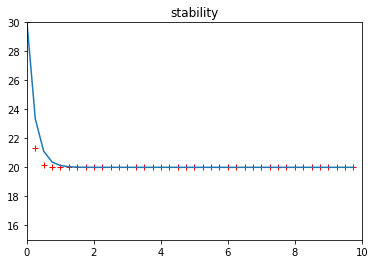

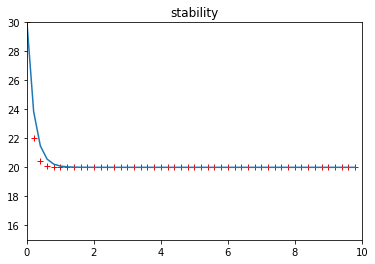

In [54]:
if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='beuler'
    npts=40
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()

if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='beuler'
    npts=50
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()
    


^^ both values are stable in backwards euler. No surprise that smaller delta t gets a result that is closer to the exact solution.

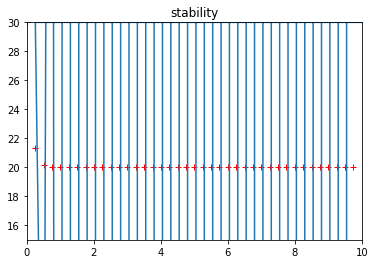

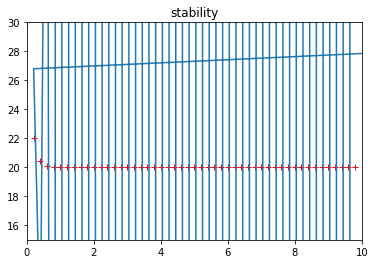

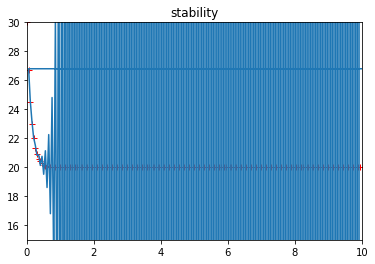

In [60]:
if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='leapfrog'
    npts=40
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()
    
if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='leapfrog'
    npts=50
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()
    
if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='leapfrog'
    npts=200
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([15,30])
    theAx.set_title('stability')
    plt.show()
    
    

The condition delta_t = -2/lambda is not stable for leapfrog, neither is delta_t <-2/lambda. at first it may appear to be at a small enough time step, but eventually it becomes unstable.

There is a way to determine the stability properties of a scheme, and
that is to apply the scheme to the *test equation*
$$\frac{dz}{dt} = \lambda z$$ where
$\lambda$ is a complex constant.

The reason for using this equation may not seem very clear. But if you
think in terms of $\lambda z$ as being the linearization of some more
complex right hand side, then the solution to is $z=e^{\lambda t}$, and
so $z$ represents, in some sense, a Fourier mode of the solution to the
linearized ODE problem. We expect that the behaviour of the simpler,
linearized problem should mimic that of the original problem.

Applying the forward Euler scheme to this test equation, results in the
following difference formula $$z_{i+1} = z_i+(\lambda \Delta t)z_i$$
which is a formula that we can apply iteratively to $z_i$ to obtain
$$\begin{aligned}
z_{i+1} &=& (1+\lambda \Delta t)z_{i} \\
        &=& (1+\lambda \Delta t)^2 z_{i-1} \\
        &=& \cdots \\
        &=& (1+\lambda \Delta t)^{i+1} z_{0}.\end{aligned}$$ The value
of $z_0$ is fixed by the initial conditions, and so this difference
equation for $z_{i+1}$ will “blow up” as $i$ gets bigger, if the factor
in front of $z_0$ is greater than 1 in magnitude – this is a sign of
instability. Hence, this analysis has led us to the conclusion that if
$$|1+\lambda\Delta t| < 1,$$ then the forward Euler method is stable.
For *real* values of $\lambda<0$, this inequality can be shown to be
equivalent to the *stability condition*
$$\Delta t < \frac{-2}{\lambda},$$ which is a restriction on how large
the time step can be so that the numerical solution is stable.